In [6]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#read in original dataframe
df =  pd.read_csv(r'autos.csv')

#selecting only the columns we care about
df = df[['price','vehicleType','yearOfRegistration','gearbox','powerPS','model',
        'kilometer','fuelType','brand','notRepairedDamage','dateCreated','postalCode']]

In [8]:
#cleaning data, removing incomplete rows
df = df[df['price']>500] #removing rows where price less than $10
df = df[df['price']<100000] #removing price outliers over $100k
df = df[df['powerPS']!=0] #removing rows where horsepower is 0
df = df.dropna() #removing all NaN values
#236878 rows

In [9]:
#removing unpopular car brands
#print(df['brand'].unique())
lst = ['rover','lancia','saab','daihatsu','daewoo','trabant','lada','opel']
df = df[df.brand.isin(lst) == False]

#should now be at 212778 rows
#df

In [10]:
#removing buses and "andere"(other) from car type
#print(df['vehicleType'].unique())
lst2=['andere','bus']
df = df[df.vehicleType.isin(lst2) == False]

#should now be at 191175 rows
#df


CLEAN, READY TO VISUALIZE

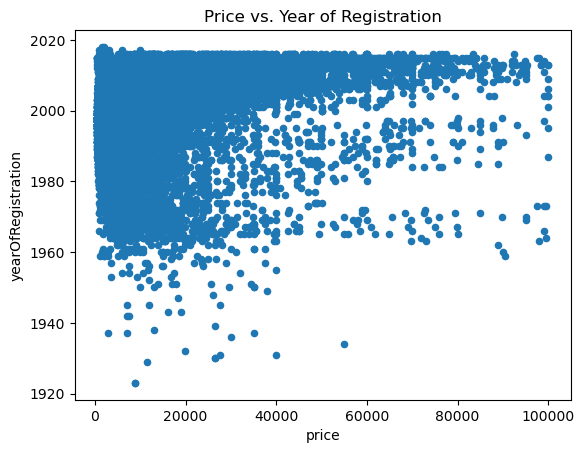

In [11]:
#scatterplot of price vs year of registration
df.plot.scatter(x = "price", y = "yearOfRegistration")
plt.title("Price vs. Year of Registration")
plt.show()



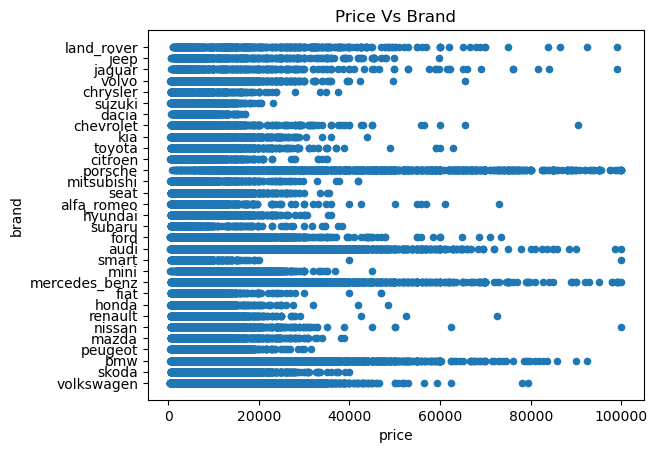

In [12]:
df.plot.scatter(x = "price", y = "brand")
plt.title("Price Vs Brand")
plt.show()

In [13]:
#df2 = df.groupby(['brand'])['brand'].count()
#df2

In [14]:
df3 = df.groupby(['yearOfRegistration'])['yearOfRegistration'].count()
df3

yearOfRegistration
1923       2
1929       1
1930       2
1931       2
1932       1
        ... 
2014    3630
2015    2038
2016     228
2017       6
2018       2
Name: yearOfRegistration, Length: 85, dtype: int64

In [15]:
df4 = df[df['yearOfRegistration']==1929]
df4

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode
241329,11500,cabrio,1929,manuell,15,andere,5000,benzin,bmw,ja,2016-03-09 00:00:00,70569


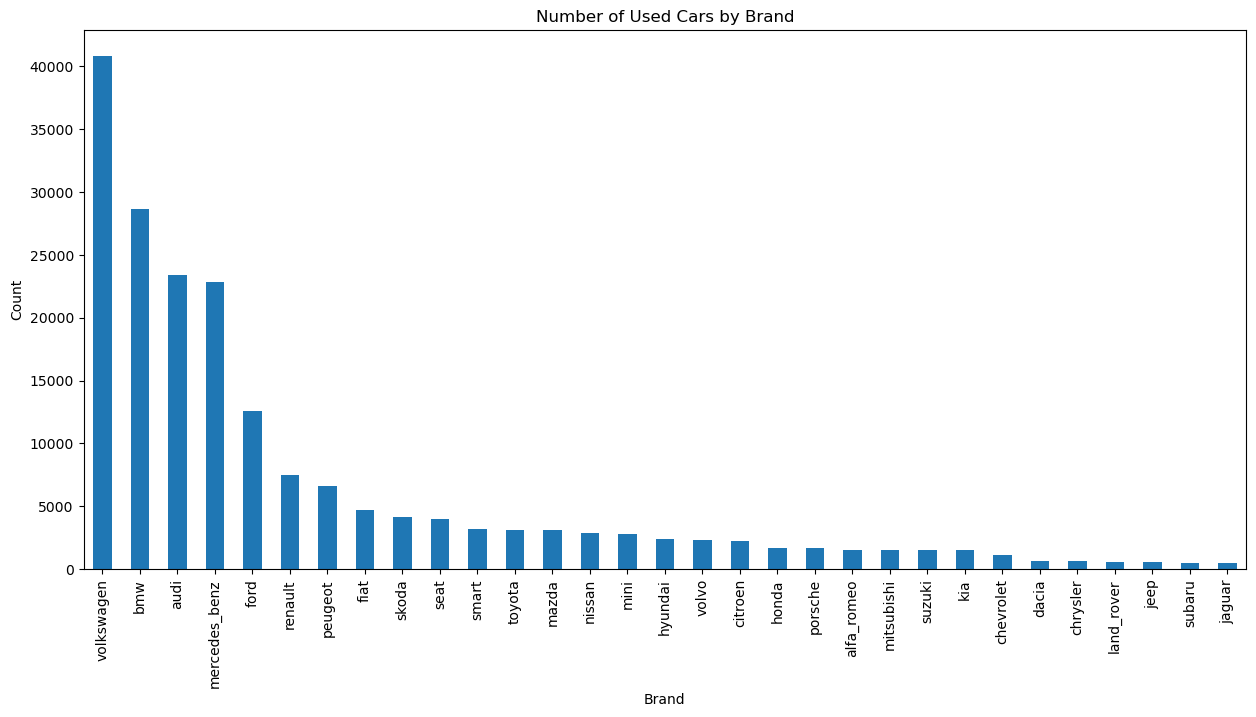

In [20]:
plt.figure()
df['brand'].value_counts().plot(kind='bar', figsize=(15, 7))
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of Used Cars by Brand')
plt.show()

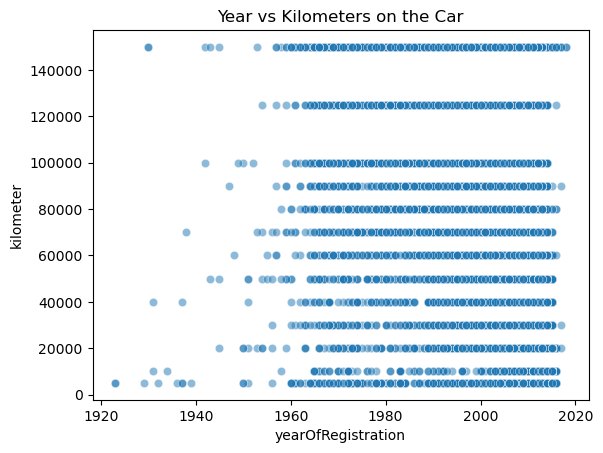

In [21]:
plt.figure()
sns.scatterplot(data=df, x='yearOfRegistration', y='kilometer', alpha=0.5)
plt.title('Year vs Kilometers on the Car')
plt.show()

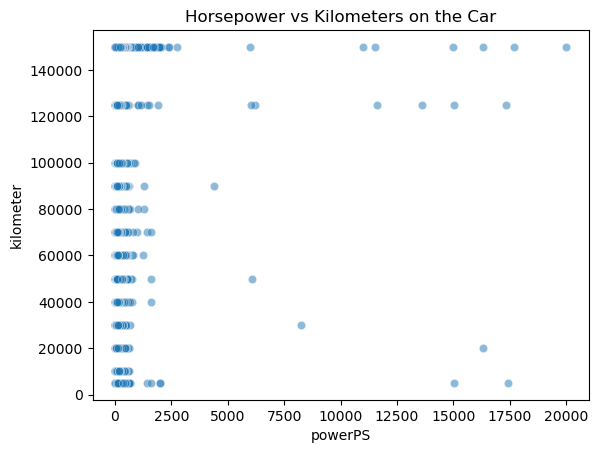

In [22]:
plt.figure()
sns.scatterplot(data=df, x='powerPS', y='kilometer', alpha=0.5)
plt.title('Horsepower vs Kilometers on the Car')
plt.show()

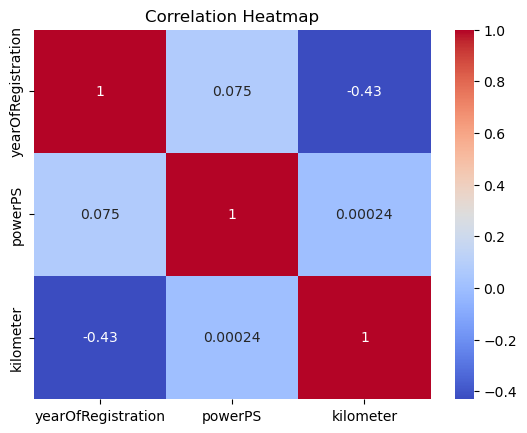

In [23]:
plt.figure()
corr_matrix = df[['yearOfRegistration', 'powerPS', 'kilometer']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

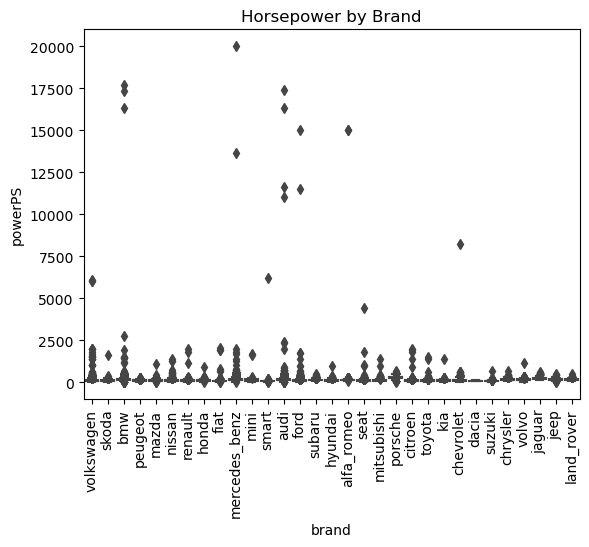

In [24]:
plt.figure()
sns.boxplot(data=df, x='brand', y='powerPS')
plt.xticks(rotation=90)
plt.title('Horsepower by Brand')
plt.show()

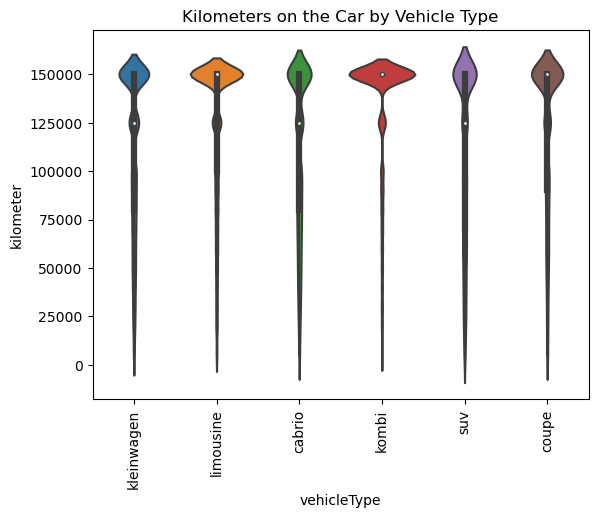

In [26]:
plt.figure()
sns.violinplot(data=df, x='vehicleType', y='kilometer')
plt.xticks(rotation=90)
plt.title('Kilometers on the Car by Vehicle Type')
plt.show()

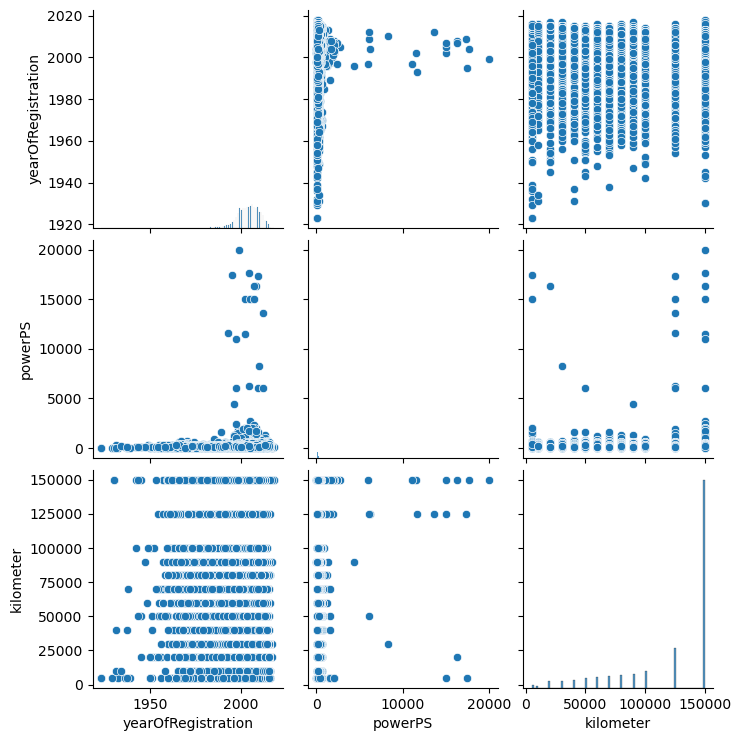

In [28]:
sns.pairplot(df[['yearOfRegistration', 'powerPS', 'kilometer']])
plt.show()

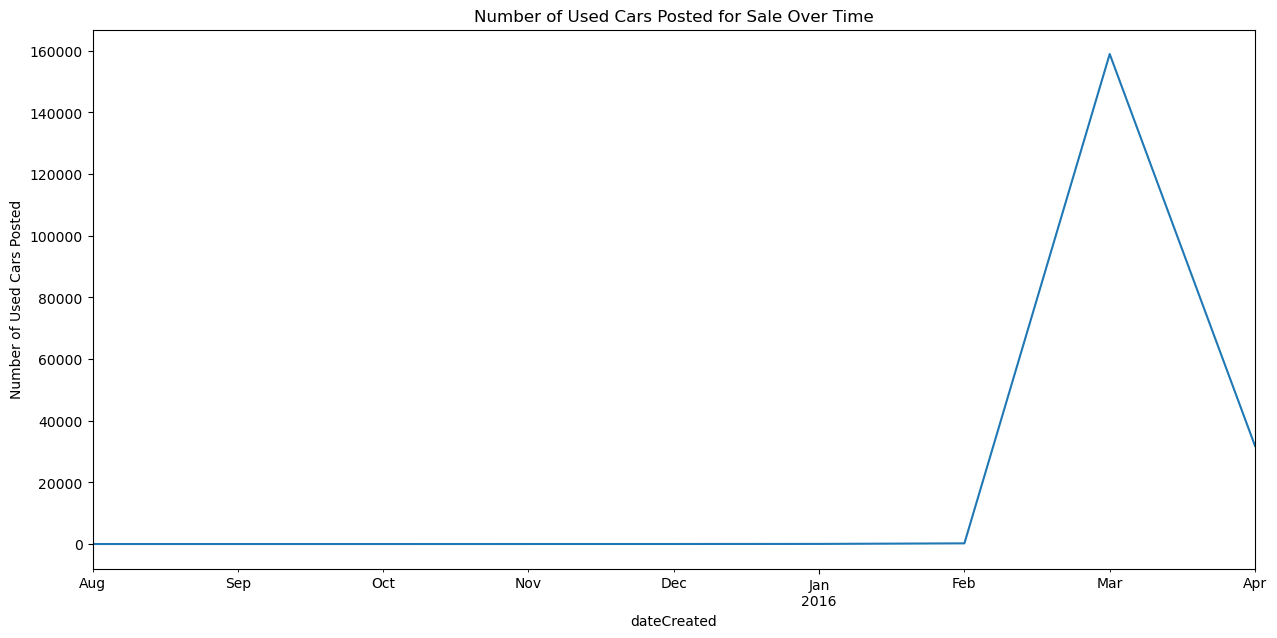

In [29]:
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df.set_index('dateCreated', inplace=True)
df.resample('M').size().plot(figsize=(15, 7))
plt.ylabel('Number of Used Cars Posted')
plt.title('Number of Used Cars Posted for Sale Over Time')
plt.show()